# Mini-Projet : Analyse exploratoire du catalogue Netflix

## Analyse des contenus Netflix (Movies & TV Shows)

Ce notebook présente une EDA du catalogue Netflix.

### Objectifs
- Explorer la structure et la qualité du dataset
- Analyser les types de contenus (films vs séries)
- Étudier la distribution des genres, pays, années de sortie
- Identifier des tendances temporelles
- Produire des visualisations pertinentes
- Synthétiser les observations principales



In [229]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)



## 1. Exploration du dataset

### 1.1 Chargement des données



In [230]:
df = pd.read_csv('netflix_titles.csv')

print(f"Dimensions du dataset : {df.shape}")
print(f"Nombre de lignes : {df.shape[0]}")
print(f"Nombre de colonnes : {df.shape[1]}")



Dimensions du dataset : (8807, 12)
Nombre de lignes : 8807
Nombre de colonnes : 12


### 1.2 Aperçu général



In [231]:
df.head()



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [232]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [233]:
df.describe(include='all')



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


### 1.3 Vérification des valeurs manquantes



Valeurs manquantes par colonne :
         Colonne  Valeurs manquantes  Pourcentage (%)
3       director                2634        29.908028
5        country                 831         9.435676
4           cast                 825         9.367549
6     date_added                  10         0.113546
8         rating                   4         0.045418
9       duration                   3         0.034064
0        show_id                   0         0.000000
1           type                   0         0.000000
2          title                   0         0.000000
7   release_year                   0         0.000000
10     listed_in                   0         0.000000
11   description                   0         0.000000


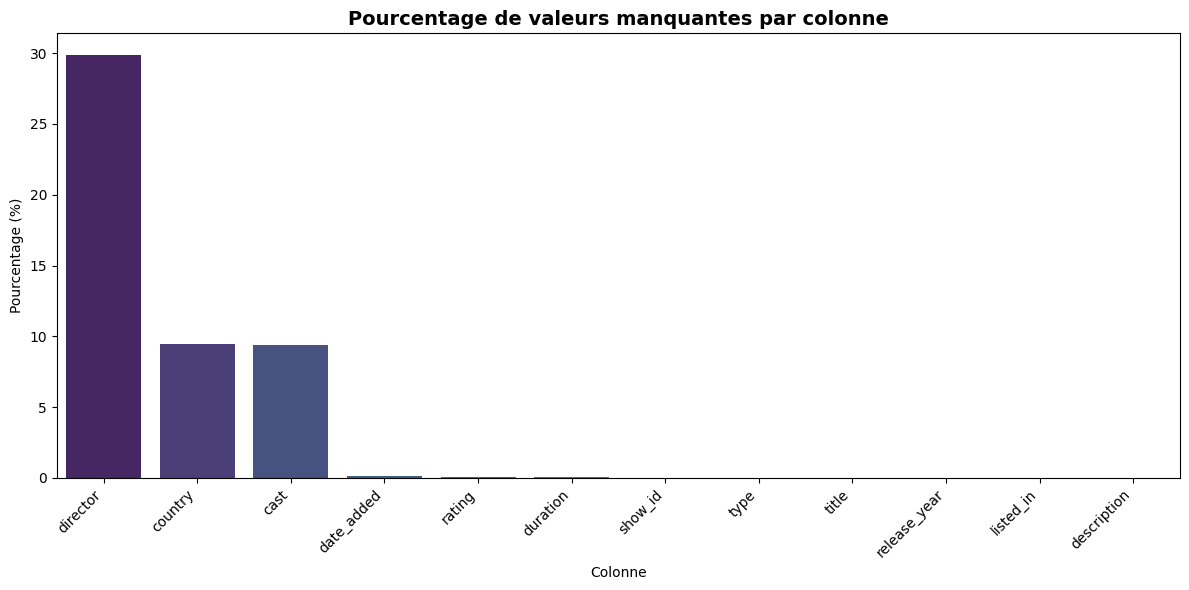

In [234]:
import matplotlib.pyplot as plt
import seaborn as sns

missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Colonne': missing_values.index,
    'Valeurs manquantes': missing_values.values,
    'Pourcentage (%)': missing_percent.values
}).sort_values('Valeurs manquantes', ascending=False)

print("Valeurs manquantes par colonne :")
print(missing_df)

plt.figure(figsize=(12, 6))
sns.barplot(data=missing_df, x='Colonne', y='Pourcentage (%)', palette='viridis')
plt.title('Pourcentage de valeurs manquantes par colonne', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Pourcentage (%)')
plt.tight_layout()
plt.show()



### 1.4 Vérification des doublons



In [235]:
duplicates = df.duplicated().sum()
print(f"Nombre de doublons : {duplicates}")

if duplicates > 0:
    print("Lignes dupliquées :")
    print(df[df.duplicated()])
else:
    print("Aucun doublon détecté dans le dataset.")



Nombre de doublons : 0
Aucun doublon détecté dans le dataset.


### 1.5 Nettoyage minimal des données



In [236]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# Gestion des erreurs spécifiques à ce dataset
erroneous_ratings = ['74 min', '84 min', '66 min']
df = df[~df['rating'].isin(erroneous_ratings)].copy()
df['country'] = df['country'].fillna('Unknown')

print("Types de données après nettoyage :")
print(df.dtypes)



Types de données après nettoyage :
show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
year_added             float64
month_added            float64
dtype: object


## 2. Analyse des contenus

### 2.1 Films vs Séries : Proportions



Distribution des types de contenus :
type
Movie      6128
TV Show    2676
Name: count, dtype: int64
Pourcentages :
type
Movie      69.604725
TV Show    30.395275
Name: proportion, dtype: float64


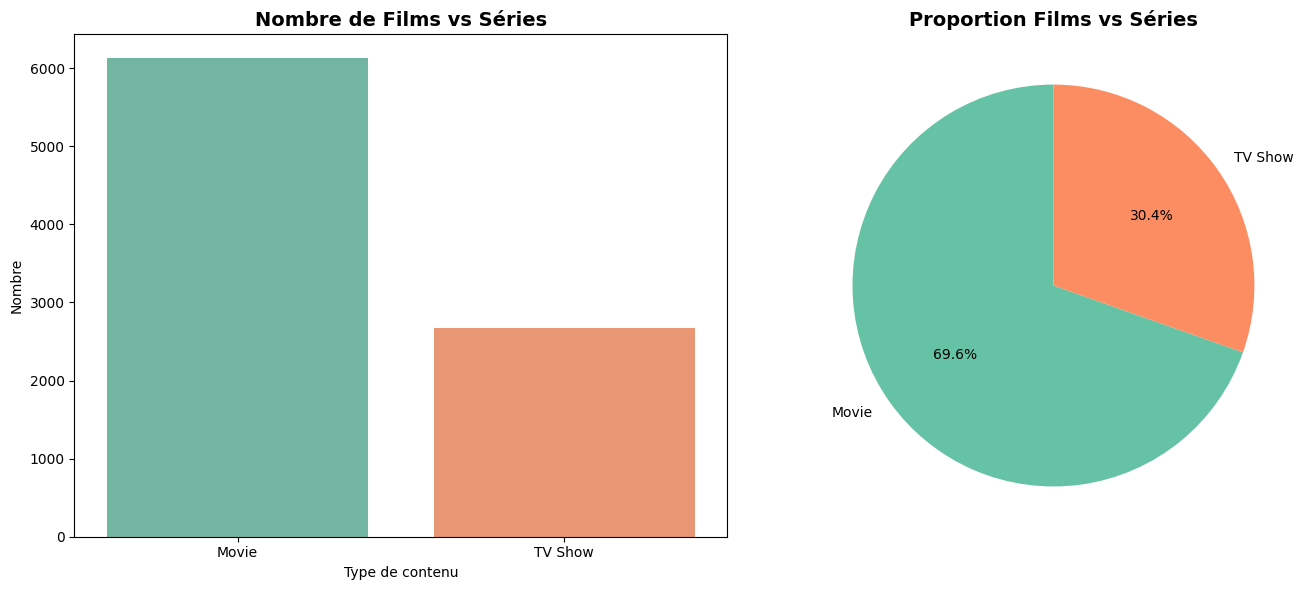

In [237]:
type_counts = df['type'].value_counts()
type_percent = df['type'].value_counts(normalize=True) * 100

print("Distribution des types de contenus :")
print(type_counts)
print(f"Pourcentages :")
print(type_percent)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(data=df, x='type', ax=axes[0], palette='Set2')
axes[0].set_title('Nombre de Films vs Séries', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Type de contenu')
axes[0].set_ylabel('Nombre')

axes[1].pie(type_counts.values, labels=type_counts.index, autopct='%1.1f%%', 
            startangle=90, colors=sns.color_palette('Set2'))
axes[1].set_title('Proportion Films vs Séries', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()



### 2.2 Tendances par année (Films vs Séries)



<Figure size 1400x600 with 0 Axes>

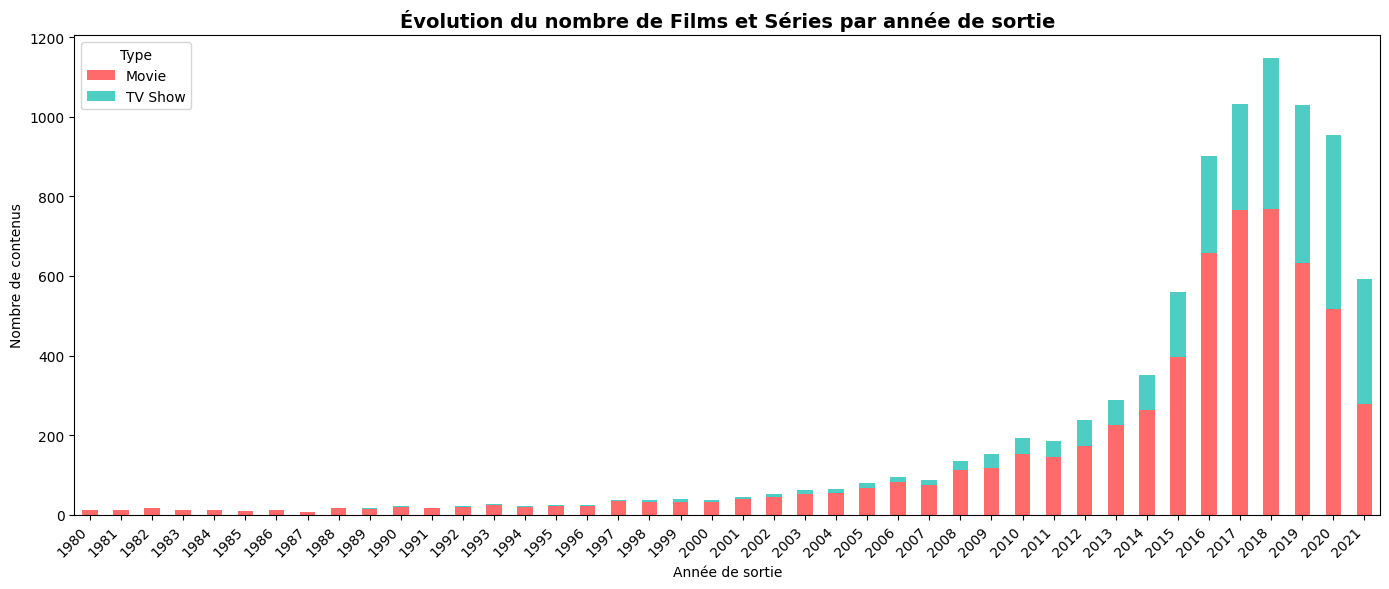

In [248]:
import plotly.express as px

type_by_year = df.groupby(['release_year', 'type']).size().unstack(fill_value=0)
type_by_year = type_by_year[type_by_year.index >= 1980]
plt.figure(figsize=(14, 6))
type_by_year.plot(kind='bar', stacked=True, color=['#FF6B6B', '#4ECDC4'], figsize=(14, 6))
plt.title('Évolution du nombre de Films et Séries par année de sortie', 
          fontsize=14, fontweight='bold')
plt.xlabel('Année de sortie')
plt.ylabel('Nombre de contenus')
plt.legend(title='Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

fig = px.bar(type_by_year, 
             x=type_by_year.index, 
             y=['Movie', 'TV Show'],
             title='Évolution du nombre de Films et Séries par année de sortie',
             labels={'value': 'Nombre de contenus', 'release_year': 'Année de sortie'},
             barmode='group')
fig.update_layout(xaxis_tickangle=-45)
fig.show()



### 2.3 Analyse des genres principaux



Top 15 des genres les plus fréquents :
                       Genre  Nombre
0       International Movies    2752
1                     Dramas    2427
2                   Comedies    1674
3     International TV Shows    1351
4              Documentaries     869
5         Action & Adventure     859
6                  TV Dramas     763
7         Independent Movies     756
8   Children & Family Movies     641
9            Romantic Movies     616
10               TV Comedies     581
11                 Thrillers     577
12            Crime TV Shows     470
13                  Kids' TV     451
14                Docuseries     395


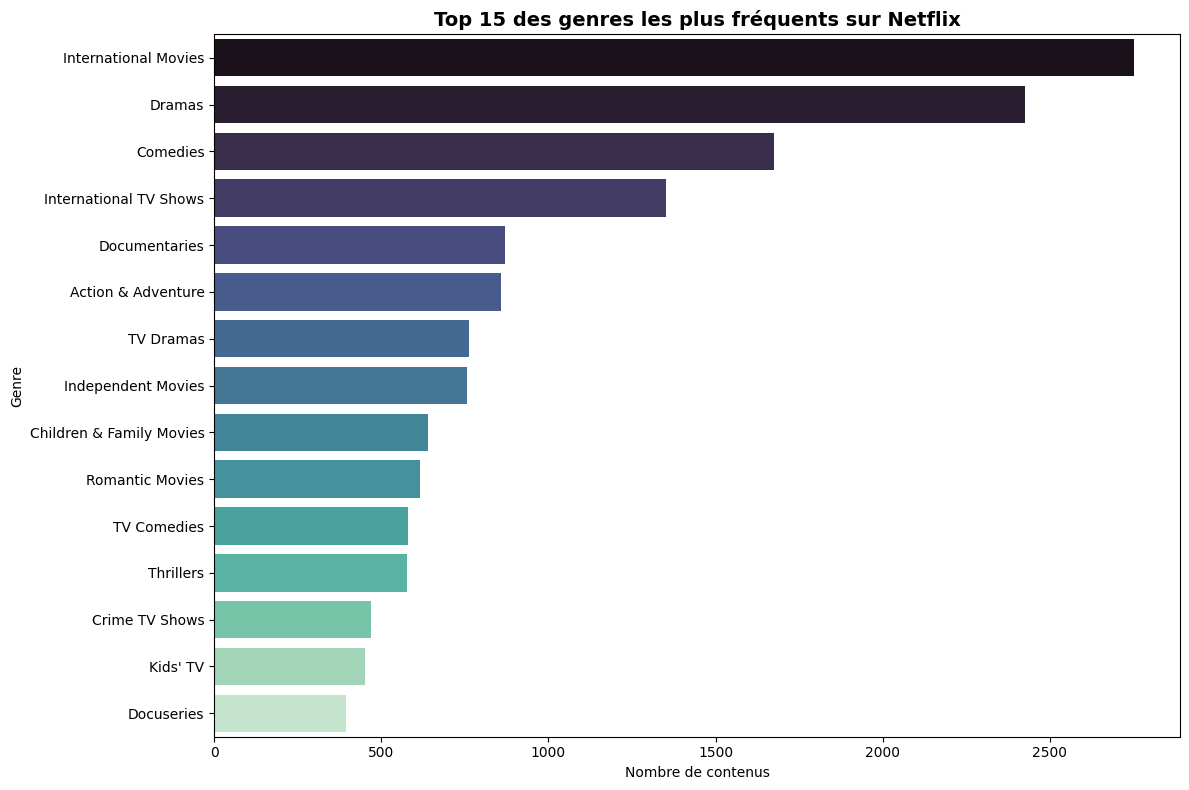

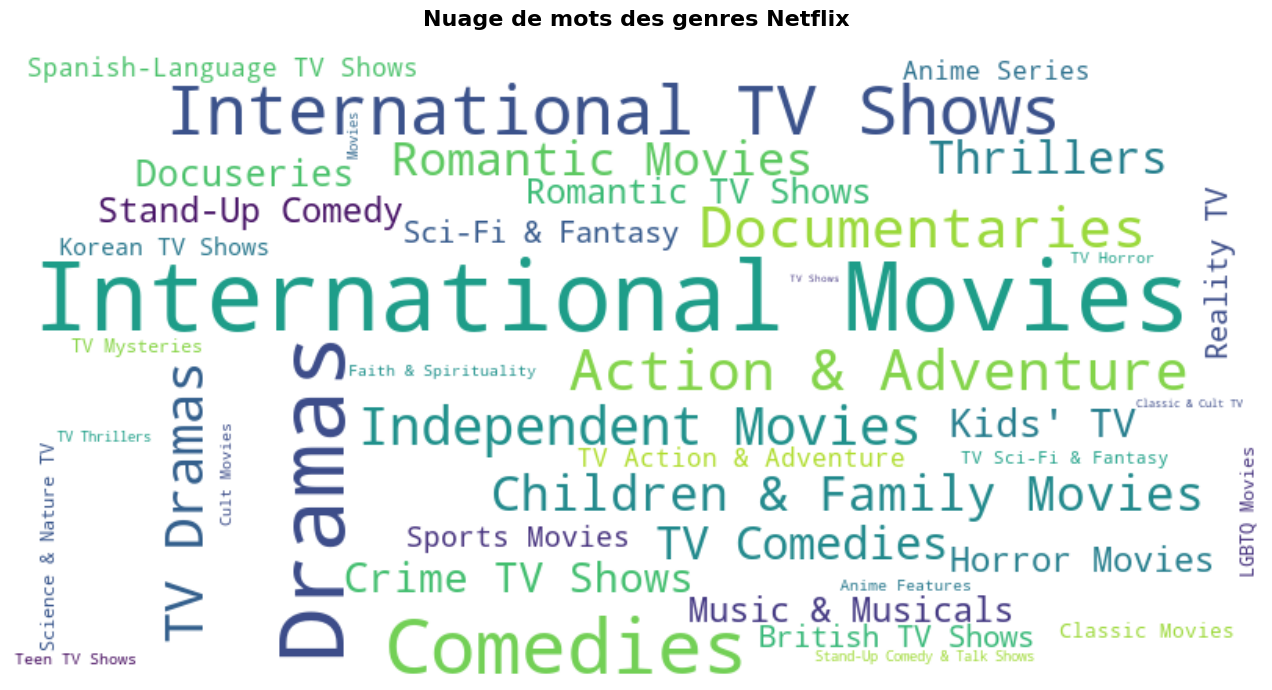

In [239]:
from collections import Counter
from wordcloud import WordCloud

all_genres = []
for genres in df['listed_in'].dropna():
    genre_list = [g.strip() for g in str(genres).split(',')]
    all_genres.extend(genre_list)

genre_counts = Counter(all_genres)
top_genres = pd.DataFrame(genre_counts.most_common(15), columns=['Genre', 'Nombre'])

print("Top 15 des genres les plus fréquents :")
print(top_genres)

plt.figure(figsize=(12, 8))
sns.barplot(data=top_genres, y='Genre', x='Nombre', palette='mako')
plt.title('Top 15 des genres les plus fréquents sur Netflix', 
          fontsize=14, fontweight='bold')
plt.xlabel('Nombre de contenus')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

wordcloud = WordCloud(width=800, height=400, background_color='white',
                      colormap='viridis', max_words=50).generate_from_frequencies(genre_counts)

plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de mots des genres Netflix', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()



### 2.4 Répartition géographique



Top 20 des pays d'origine :
              Pays  Nombre
0    United States    3687
1            India    1046
2          Unknown     831
3   United Kingdom     806
4           Canada     445
5           France     393
6            Japan     318
7            Spain     232
8      South Korea     231
9          Germany     226
10          Mexico     169
11           China     162
12       Australia     160
13           Egypt     117
14          Turkey     113
15       Hong Kong     105
16         Nigeria     103
17           Italy     100
18          Brazil      97
19       Argentina      91
Contenus avec pays inconnu : 831 (9.4%)


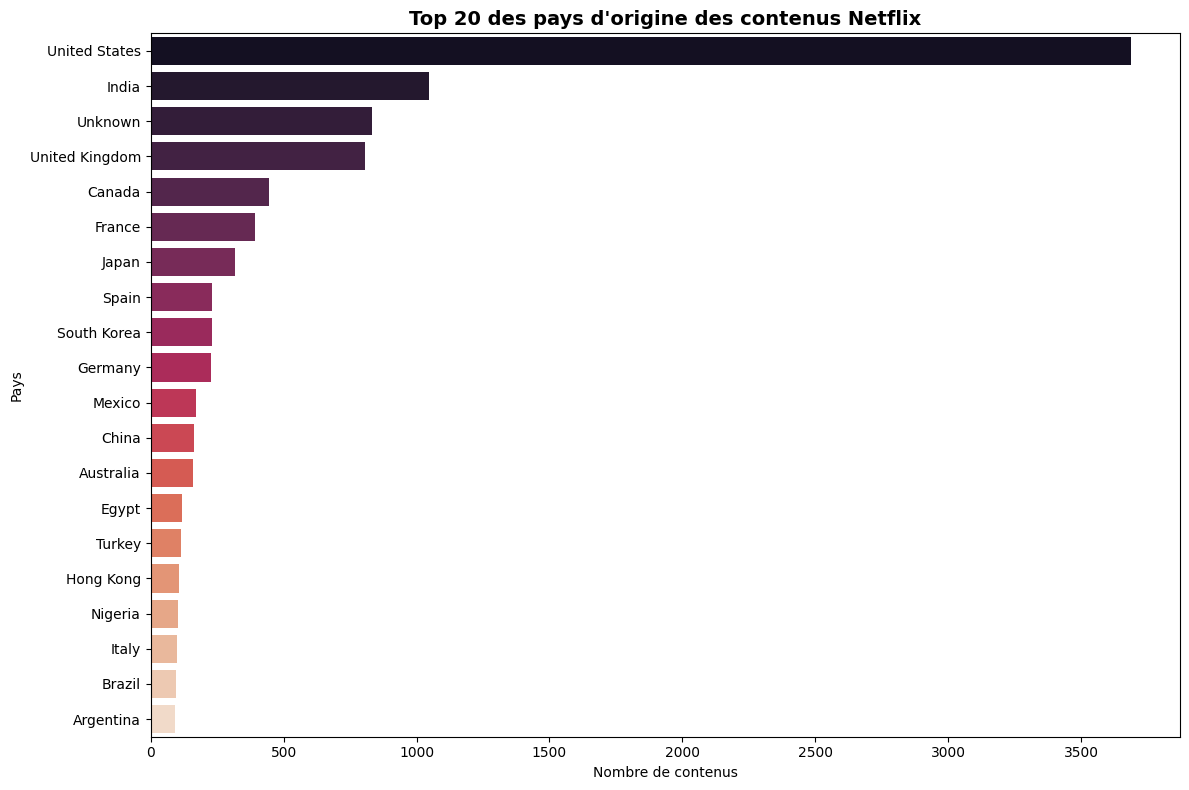

In [240]:
all_countries = []
for countries in df['country']:
    country_list = [c.strip() for c in str(countries).split(',')]
    all_countries.extend(country_list)

country_counts = Counter(all_countries)
top_countries = pd.DataFrame(country_counts.most_common(20), 
                             columns=['Pays', 'Nombre'])

print("Top 20 des pays d'origine :")
print(top_countries)

unknown_count = country_counts.get('Unknown', 0)
if unknown_count > 0:
    print(f"Contenus avec pays inconnu : {unknown_count} ({unknown_count/len(df)*100:.1f}%)")

plt.figure(figsize=(12, 8))
sns.barplot(data=top_countries, y='Pays', x='Nombre', palette='rocket')
plt.title('Top 20 des pays d\'origine des contenus Netflix', 
          fontsize=14, fontweight='bold')
plt.xlabel('Nombre de contenus')
plt.ylabel('Pays')
plt.tight_layout()
plt.show()

fig = px.bar(top_countries.head(15), 
             x='Nombre', 
             y='Pays',
             orientation='h',
             title='Top 15 des pays d\'origine des contenus Netflix',
             labels={'Nombre': 'Nombre de contenus', 'Pays': 'Pays'},
             color='Nombre',
             color_continuous_scale='Viridis')
fig.update_layout(yaxis={'categoryorder': 'total ascending'})
fig.show()



### 2.5 Analyse du casting et des réalisateurs



Top 15 des réalisateurs les plus fréquents :
            Réalisateur  Nombre
0         Rajiv Chilaka      22
1             Jan Suter      21
2           Raúl Campos      19
3           Suhas Kadav      16
4          Marcus Raboy      16
5             Jay Karas      15
6   Cathy Garcia-Molina      13
7       Youssef Chahine      12
8       Martin Scorsese      12
9           Jay Chapman      12
10     Steven Spielberg      11
11     Don Michael Paul      10
12         David Dhawan       9
13       Yılmaz Erdoğan       9
14       Anurag Kashyap       9
Top 15 des acteurs les plus fréquents :
              Acteur  Nombre
0        Anupam Kher      43
1     Shah Rukh Khan      35
2      Julie Tejwani      33
3   Naseeruddin Shah      32
4   Takahiro Sakurai      32
5       Rupa Bhimani      31
6       Akshay Kumar      30
7            Om Puri      30
8          Yuki Kaji      29
9   Amitabh Bachchan      28
10      Paresh Rawal      28
11       Boman Irani      27
12       Rajesh Kava      

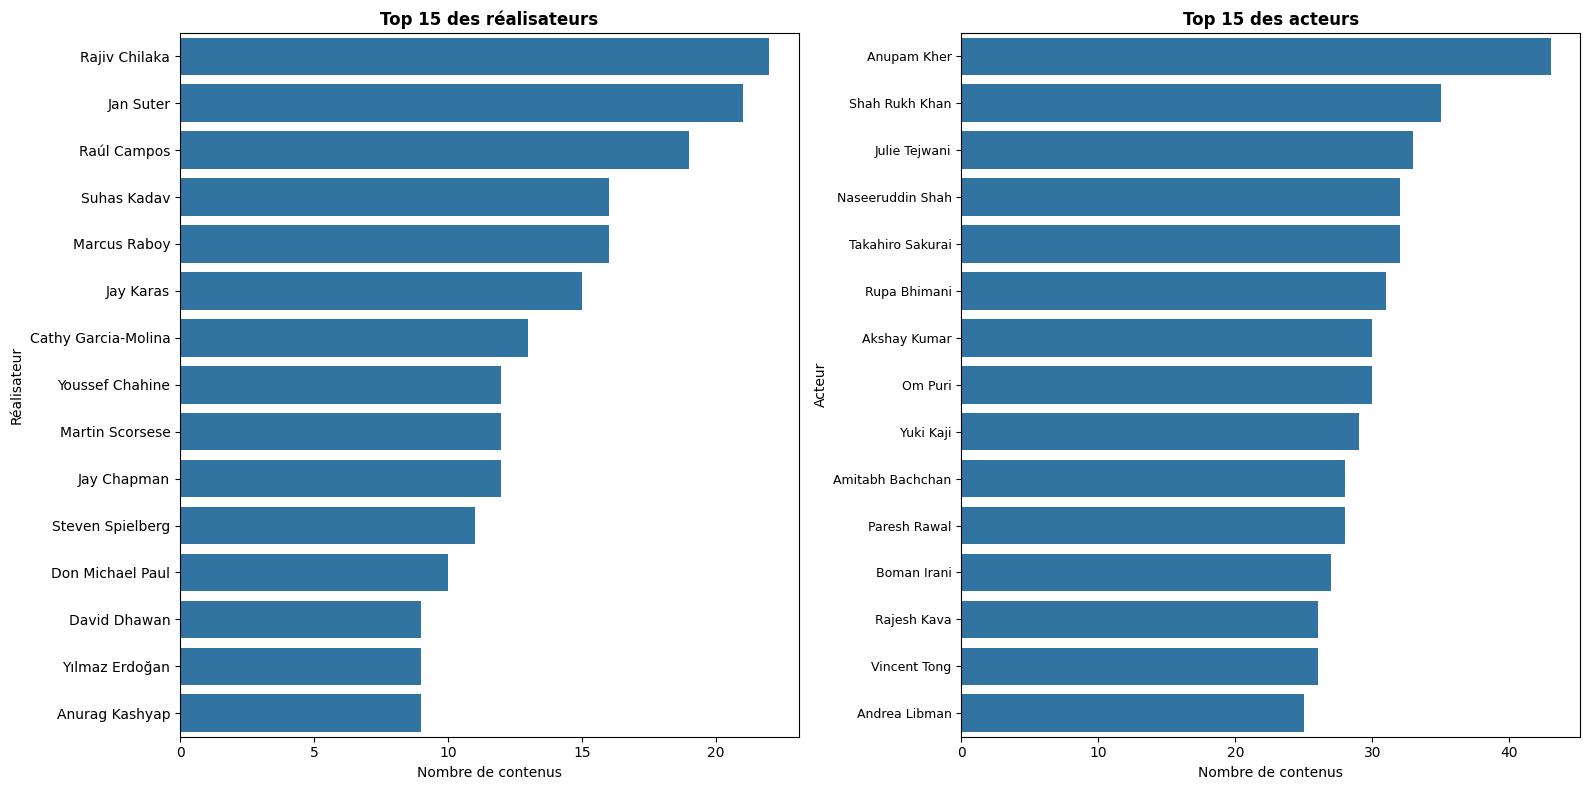

In [241]:
directors = df['director'].dropna()
all_directors = []
for director_list in directors:
    director_names = [d.strip() for d in str(director_list).split(',')]
    all_directors.extend(director_names)

director_counts = Counter(all_directors)
top_directors = pd.DataFrame(director_counts.most_common(15), 
                             columns=['Réalisateur', 'Nombre'])

print("Top 15 des réalisateurs les plus fréquents :")
print(top_directors)

cast = df['cast'].dropna()
all_actors = []
for actor_list in cast:
    actor_names = [a.strip() for a in str(actor_list).split(',')]
    all_actors.extend(actor_names)

actor_counts = Counter(all_actors)
top_actors = pd.DataFrame(actor_counts.most_common(15), 
                          columns=['Acteur', 'Nombre'])

print("Top 15 des acteurs les plus fréquents :")
print(top_actors)

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

sns.barplot(data=top_directors, y='Réalisateur', x='Nombre', ax=axes[0])
axes[0].set_title('Top 15 des réalisateurs', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Nombre de contenus')

sns.barplot(data=top_actors, y='Acteur', x='Nombre', ax=axes[1])
axes[1].set_title('Top 15 des acteurs', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Nombre de contenus')
axes[1].tick_params(axis='y', labelsize=9)

plt.tight_layout()
plt.show()



### 3.2 Analyse de la colonne date_added



Nombre d'ajouts par année sur Netflix :
year_added
2008.0       2
2009.0       2
2010.0       1
2011.0      13
2012.0       3
2013.0      10
2014.0      23
2015.0      73
2016.0     416
2017.0    1163
2018.0    1625
2019.0    1999
2020.0    1878
2021.0    1498
Name: count, dtype: int64


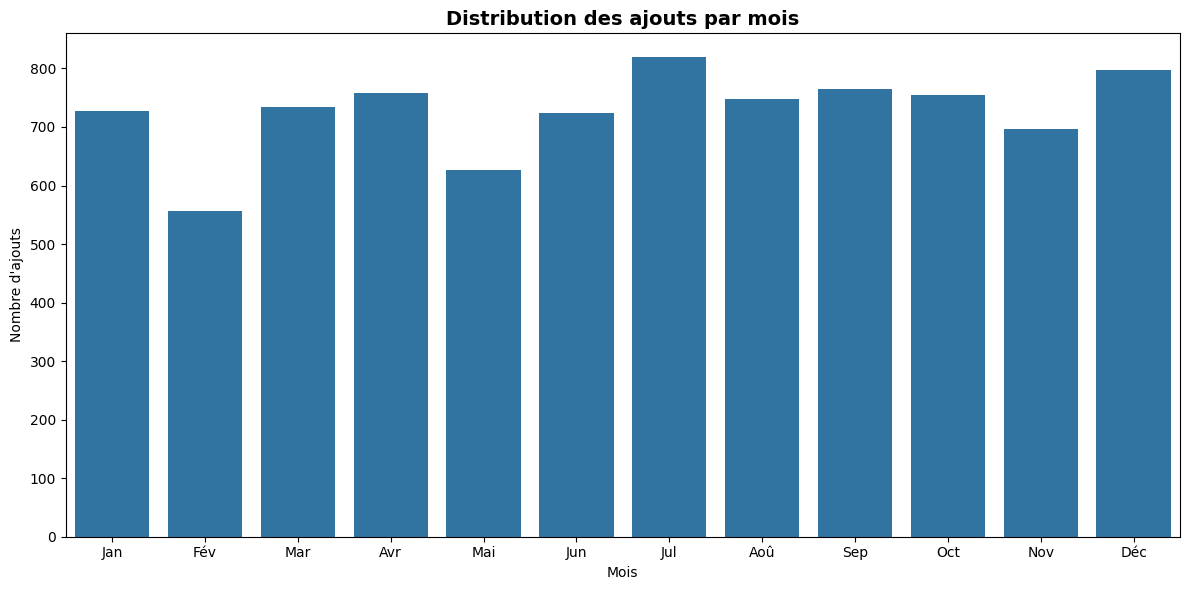

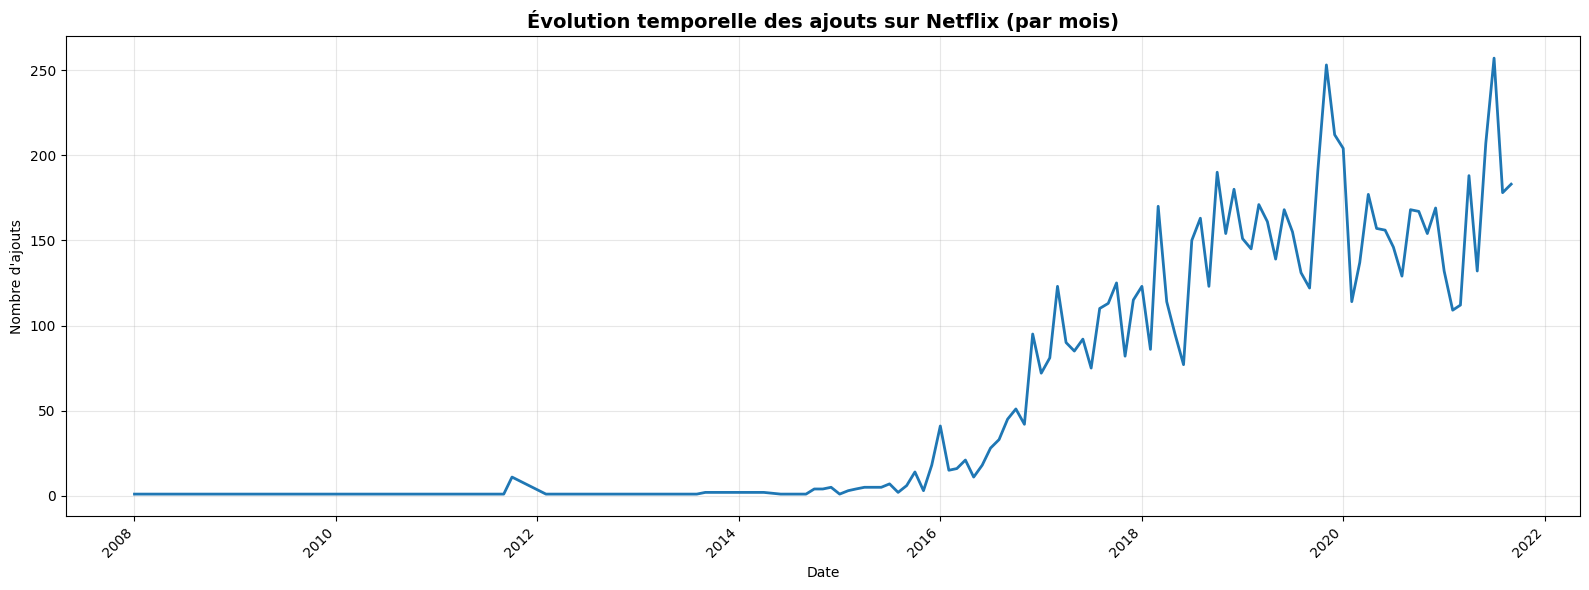

In [242]:
additions_by_year = df['year_added'].value_counts().sort_index()

print("Nombre d'ajouts par année sur Netflix :")
print(additions_by_year)

additions_by_month = df['month_added'].value_counts().sort_index()
month_names = ['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Jun', 
               'Jul', 'Aoû', 'Sep', 'Oct', 'Nov', 'Déc']

plt.figure(figsize=(12, 6))
sns.barplot(x=additions_by_month.index, y=additions_by_month.values)
plt.title('Distribution des ajouts par mois', fontsize=14, fontweight='bold')
plt.xlabel('Mois')
plt.ylabel('Nombre d\'ajouts')
plt.xticks(range(12), month_names)
plt.tight_layout()
plt.show()

df['year_month'] = df['date_added'].dt.to_period('M')
additions_by_month_year = df['year_month'].value_counts().sort_index()
additions_by_month_year.index = additions_by_month_year.index.to_timestamp()

plt.figure(figsize=(16, 6))
additions_by_month_year.plot(kind='line', linewidth=2)
plt.title('Évolution temporelle des ajouts sur Netflix (par mois)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Nombre d\'ajouts')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

fig = px.line(x=additions_by_year.index, y=additions_by_year.values,
              title='Évolution du nombre d\'ajouts de contenus sur Netflix par année',
              labels={'x': 'Année', 'y': 'Nombre d\'ajouts'},
              markers=True)
fig.show()

fig_ts = px.line(x=additions_by_month_year.index, y=additions_by_month_year.values,
                 title='Évolution temporelle des ajouts sur Netflix (série temporelle continue)',
                 labels={'x': 'Date', 'y': 'Nombre d\'ajouts'})
fig_ts.update_layout(xaxis_tickangle=-45)
fig_ts.show()



### 3.3 Analyse des durées



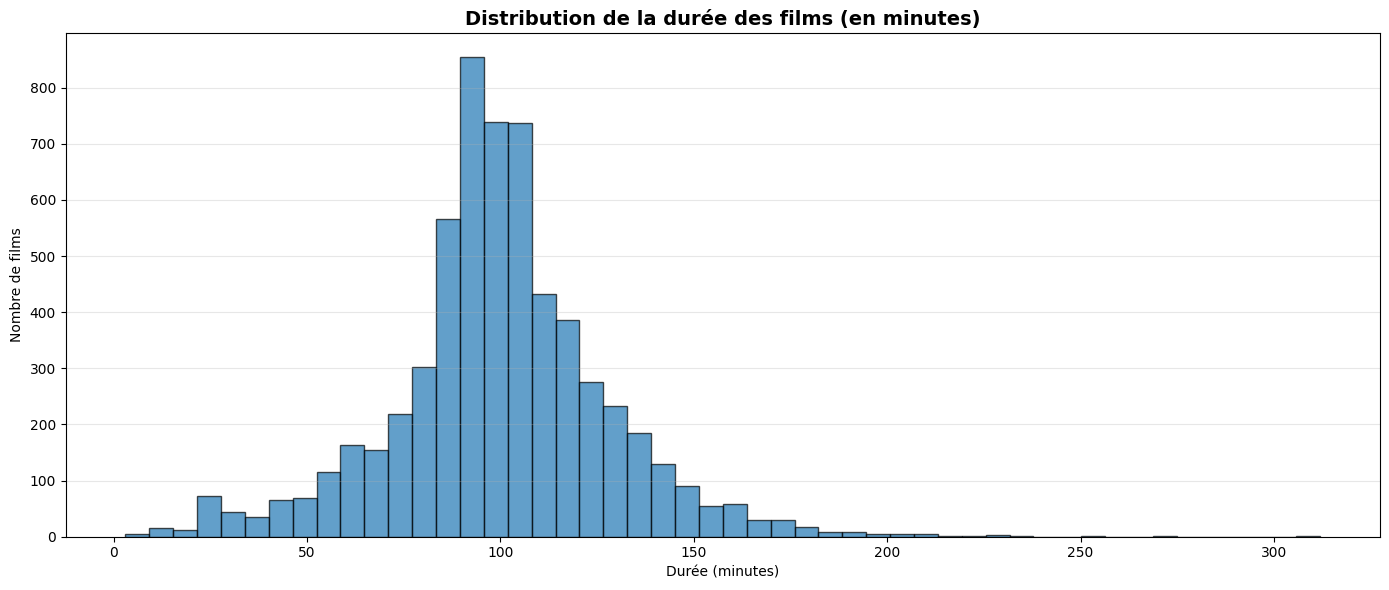

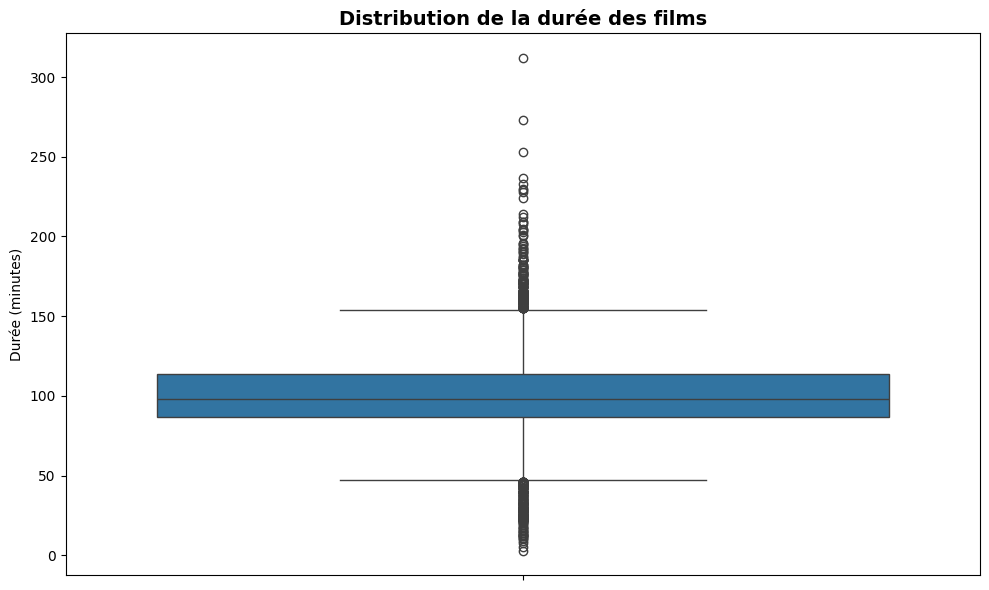

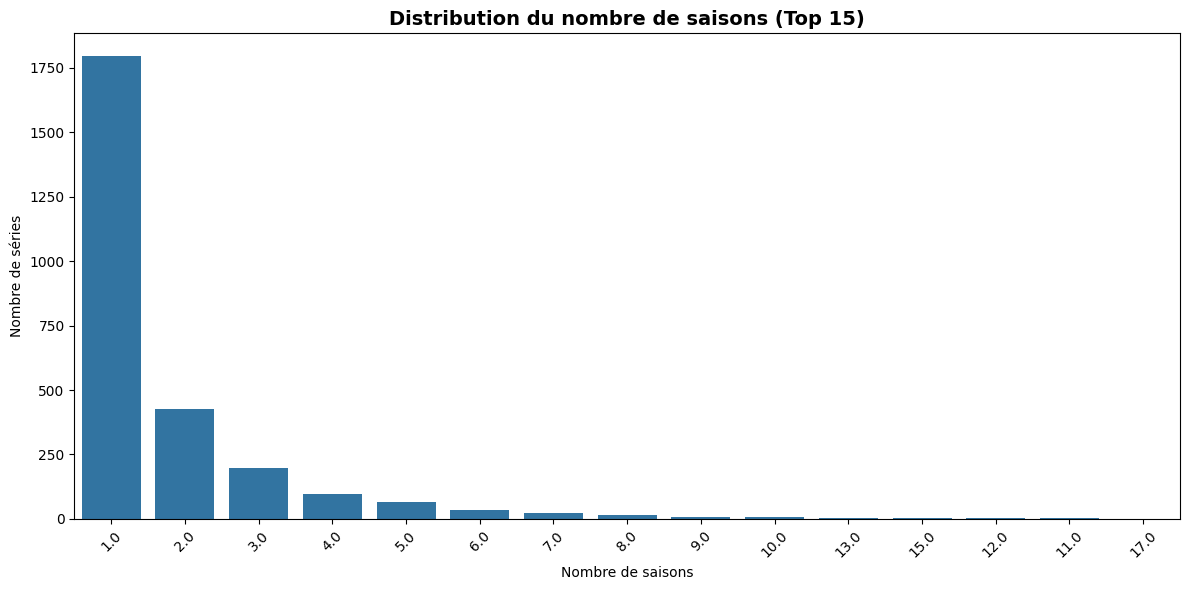

Durée moyenne des films : 99.6 minutes
Nombre moyen de saisons pour les séries : 1.8 saisons


In [243]:
df_movies = df[df['type'] == 'Movie'].copy()
df_movies['duration_min'] = df_movies['duration'].str.extract('(\d+)').astype(float)

df_shows = df[df['type'] == 'TV Show'].copy()
df_shows['num_seasons'] = df_shows['duration'].str.extract('(\d+)').astype(float)

plt.figure(figsize=(14, 6))
plt.hist(df_movies['duration_min'].dropna(), bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution de la durée des films (en minutes)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Durée (minutes)')
plt.ylabel('Nombre de films')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(y=df_movies['duration_min'])
plt.title('Distribution de la durée des films', fontsize=14, fontweight='bold')
plt.ylabel('Durée (minutes)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df_shows, x='num_seasons', order=df_shows['num_seasons'].value_counts().head(15).index)
plt.title('Distribution du nombre de saisons (Top 15)', fontsize=14, fontweight='bold')
plt.xlabel('Nombre de saisons')
plt.ylabel('Nombre de séries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"Durée moyenne des films : {df_movies['duration_min'].mean():.1f} minutes")
print(f"Nombre moyen de saisons pour les séries : {df_shows['num_seasons'].mean():.1f} saisons")



### 3.4 Analyse des ratings (classifications)



Distribution des classifications :
rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64


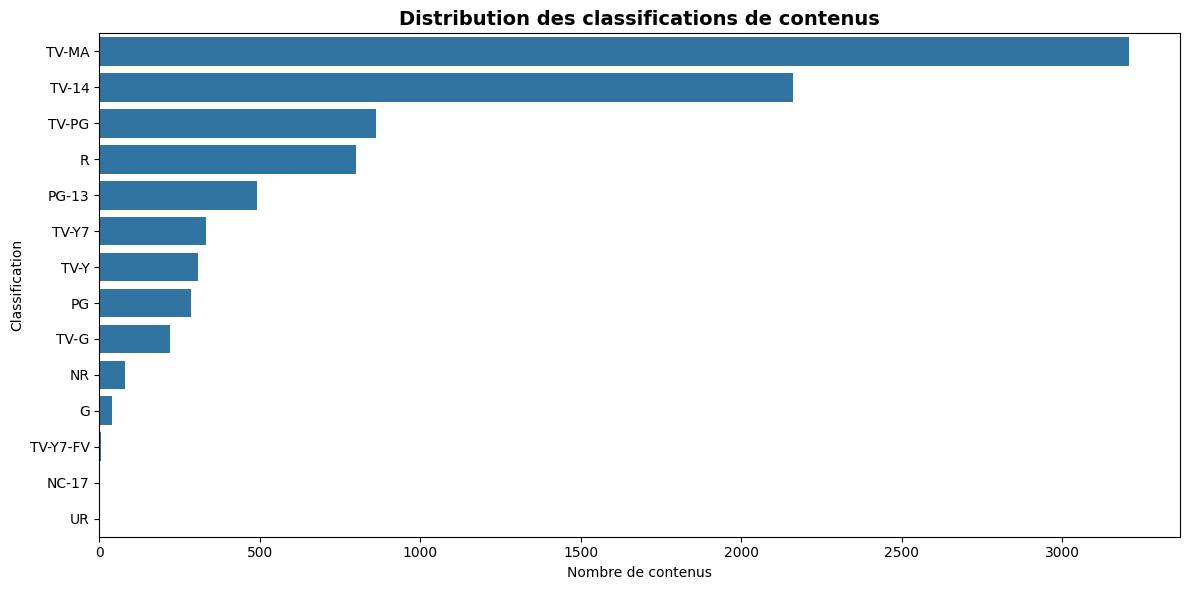

In [244]:
rating_counts = df['rating'].value_counts()

print("Distribution des classifications :")
print(rating_counts)

plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='rating', order=rating_counts.index)
plt.title('Distribution des classifications de contenus', fontsize=14, fontweight='bold')
plt.xlabel('Nombre de contenus')
plt.ylabel('Classification')
plt.tight_layout()
plt.show()

fig = px.pie(values=rating_counts.values, names=rating_counts.index,
             title='Répartition des classifications de contenus Netflix')
fig.show()



## 4. Visualisations supplémentaires

### 4.1 Heatmap de corrélations temporelles



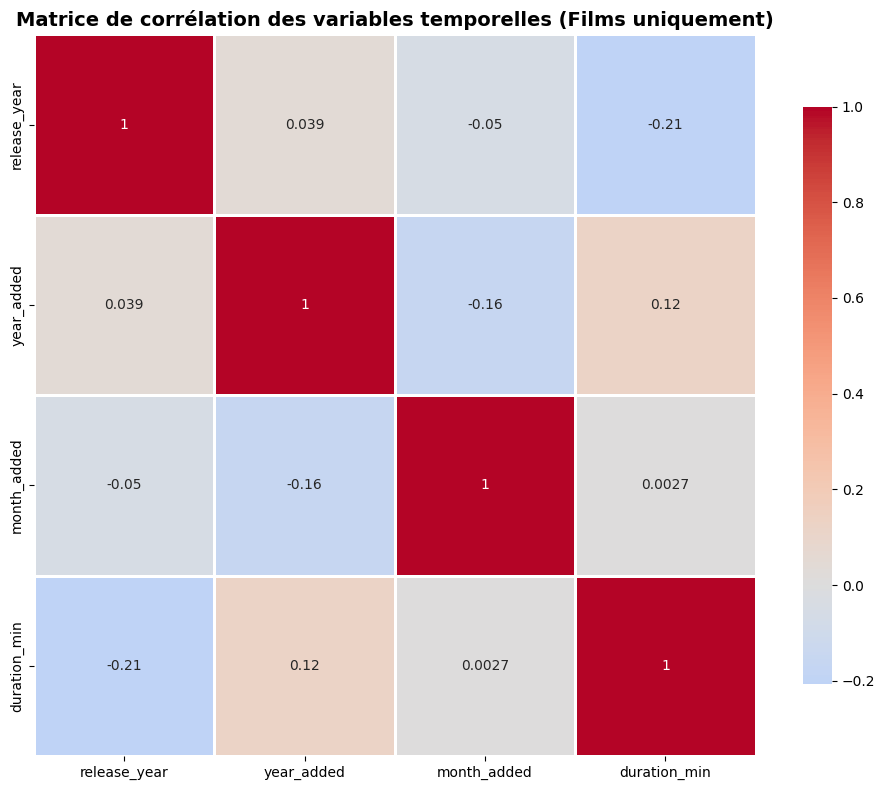

In [245]:
numeric_cols = ['release_year', 'year_added', 'month_added', 'duration_min']
corr_data = df_movies[numeric_cols].dropna()
correlation_matrix = corr_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matrice de corrélation des variables temporelles (Films uniquement)', 
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()



### 4.2 Timeline interactive des ajouts



In [246]:
timeline_data = df.groupby(['year_added', 'type']).size().reset_index(name='count')
timeline_data = timeline_data[timeline_data['year_added'].notna()]

fig = px.scatter(timeline_data, 
                 x='year_added', 
                 y='count',
                 color='type',
                 size='count',
                 hover_data=['type'],
                 title='Timeline interactive des ajouts de contenus sur Netflix',
                 labels={'year_added': 'Année', 'count': 'Nombre d\'ajouts'})
fig.update_layout(legend=dict(title='Type de contenu'))
fig.show()



### 4.3 Analyse croisée : Genres par pays



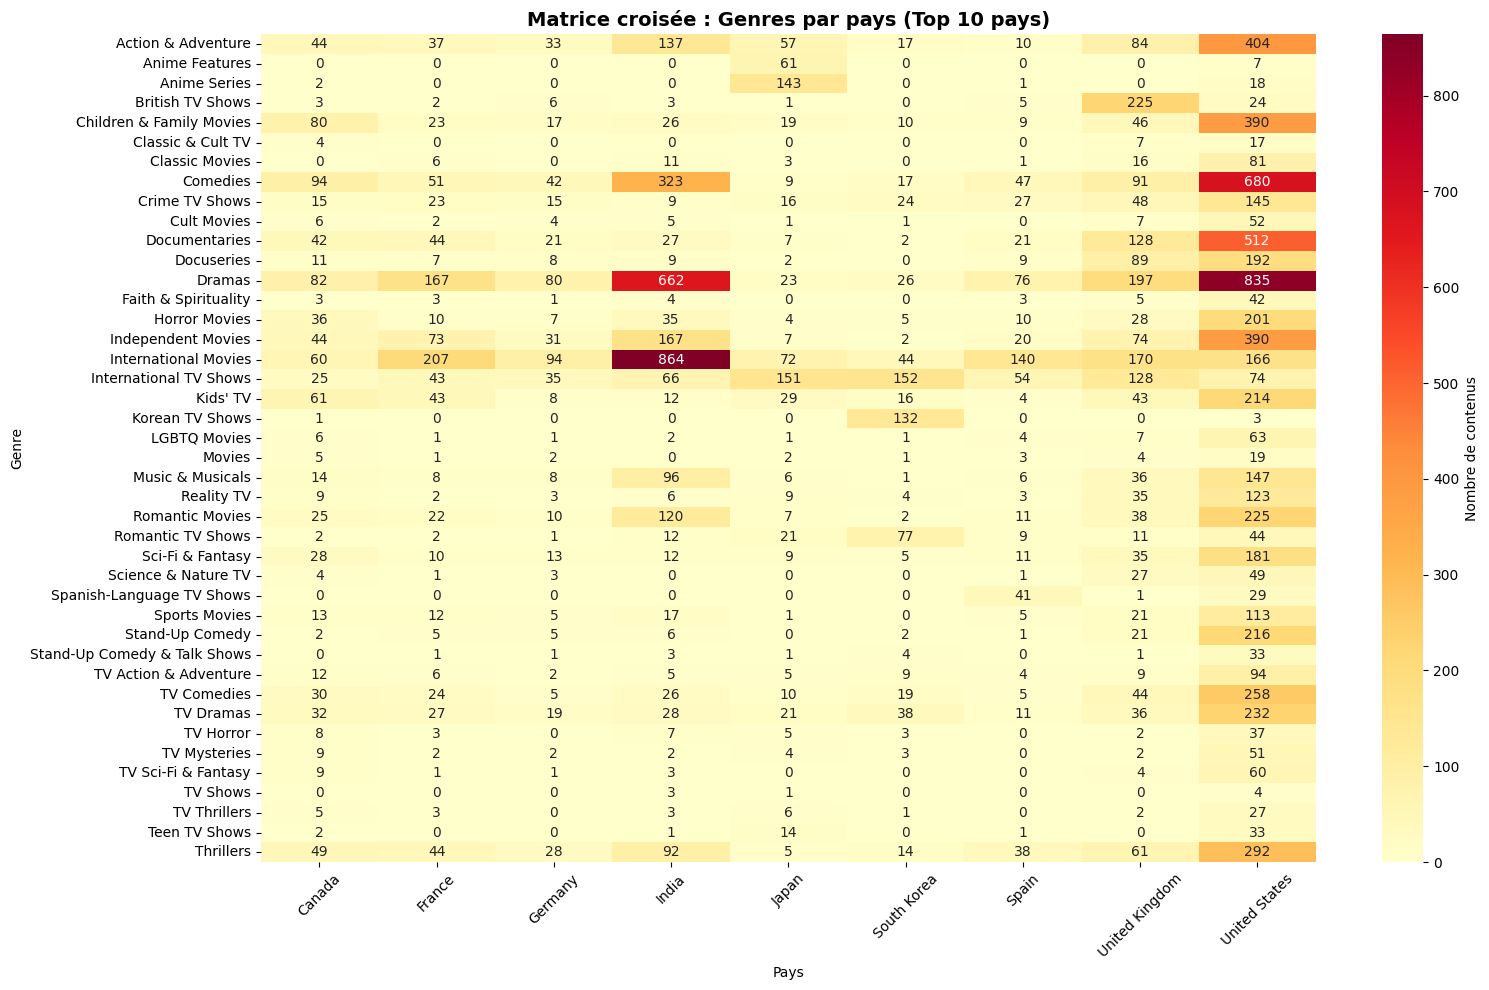

In [247]:
top_10_countries = top_countries.head(10)
top_10_countries = top_10_countries[top_10_countries['Pays'] != 'Unknown']['Pays'].tolist()

df_filtered = df[df['listed_in'].notna()].copy()

genre_country_list = []
for _, row in df_filtered.iterrows():
    countries = [c.strip() for c in str(row['country']).split(',')]
    genres = [g.strip() for g in str(row['listed_in']).split(',')]
    for country in countries:
        if country in top_10_countries:
            for genre in genres:
                genre_country_list.append({'Pays': country, 'Genre': genre})

genre_country_df = pd.DataFrame(genre_country_list)
genre_country_cross = pd.crosstab(genre_country_df['Pays'], genre_country_df['Genre'])

plt.figure(figsize=(16, 10))
sns.heatmap(genre_country_cross.T, annot=True, fmt='d', cmap='YlOrRd', 
            cbar_kws={'label': 'Nombre de contenus'})
plt.title('Matrice croisée : Genres par pays (Top 10 pays)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Pays')
plt.ylabel('Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

